In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [ ]:


# 1. Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2,2)  # 2 qubits, 2 classical bits for measurement

# 2. Prepare Qubit 0 in the |+⟩ state
qc.h(0)  # Apply Hadamard gate to Qubit 0 to create state |+⟩
         # This transforms the initial state |0⟩ to the superposition state |+⟩ = (1/√2)(|0⟩ + |1⟩).
# 3. Prepare Qubit 1 in the |1⟩ state
qc.x(1)  # Apply X gate (NOT gate) to Qubit 1 to create state |1⟩
         # This flips the initial state |0⟩ to |1⟩.

# At this point, the state of the qubits is |+⟩ |1⟩ = (1/√2 (|0⟩ + |1⟩)) |1⟩
# = 1/√2 (|01⟩ + |11⟩)

# 4. Entangle the qubits using a CNOT (CX) gate
# Control qubit is 0, target qubit is 1
qc.cx(0, 1)

# Now, let's analyze the state after the CX gate:
# - If the control qubit (Qubit 0) is |0⟩, the target qubit (Qubit 1) remains unchanged.
# - If the control qubit (Qubit 0) is |1⟩, the target qubit (Qubit 1) is flipped (X gate is applied).
# The resulting entangled state is 1/√2 (|01⟩ + |10⟩), which is a Bell state (|Φ+⟩)

# In this state, measuring Qubit 0 and Qubit 1 will always yield opposite results.

# 5. Measure the qubits
qc.measure_all()  # instructs the simulator to measure both qubits. The outcome of Qubit 0 is stored in classical bit 0, and the outcome of Qubit 1 is stored in classical bit 1.

qc.draw()


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

Counts: {'01': 504, '10': 496}


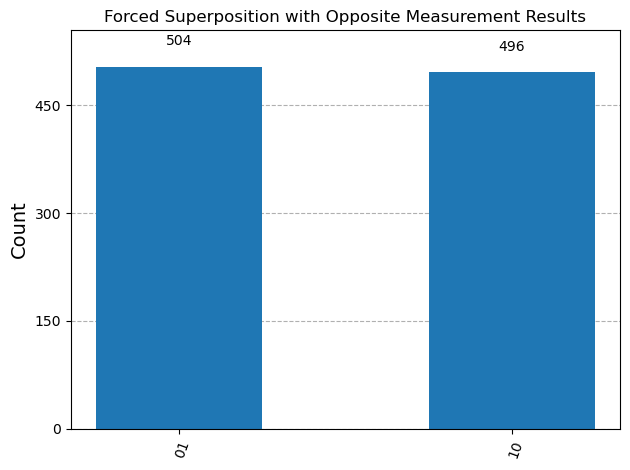

In [3]:
# 6. Simulate the circuit
#AerSimulator -> a local Qiskit simulator, to run the quantum circuit.
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator) # optimizes the circuit for the chosen backend.

# Run the simulation with 1000 shots
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)

# 7. Print the counts
print("Counts:", counts)

# 8. Plot the histogram of the counts


plot_histogram(counts, title="Forced Superposition with Opposite Measurement Results")
